<a href="https://colab.research.google.com/github/51stDimension/AIML/blob/main/Experiments/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2022-11-29 16:55:38--  https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/latent_variable_models_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1765 (1.7K) [text/plain]
Saving to: ‘latent_variable_models_util.py’

latent_variable_mod 100%[===================>]   1.72K  --.-KB/s    in 0s      

2022-11-29 16:55:38 (21.7 MB/s) - ‘latent_variable_models_util.py’ saved [1765/1765]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for daft: filename=daft-0.1.0-py3-none-any.whl size=11394 sha256=5cad2180abab0380e3cbd1846c9a7fe2e89f1b3913307ae9e5524c26e0604fe8
  Stored in directory: /root/.cache/pip/wheels/c5/a0/aa/1b00104fc9c9ebbdfa9636ea64df39d67b46345f2b8f1d24fc

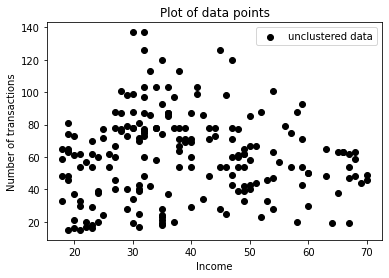

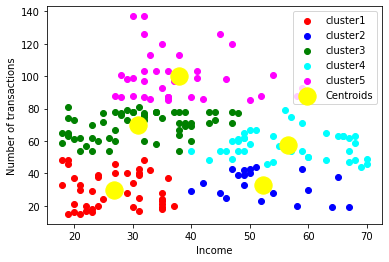

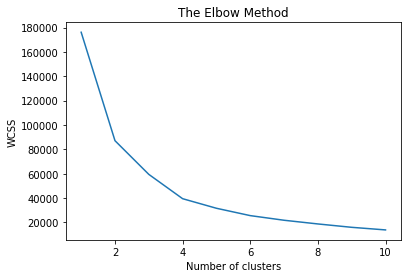

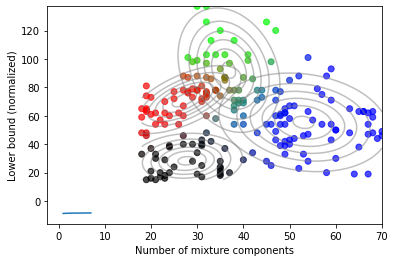

In [1]:
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
try:
# Check if notebook is running in Google Colab
  import google.colab
  # Get additional files from Github

  !wget https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/master/latent_variable_models_util.py

  # Install additional dependencies
  !pip install daft==0.1.0
except:
  pass
from latent_variable_models_util import n_true, mu_true, sigma_true
from latent_variable_models_util import generate_data, plot_data, plot_densities

%matplotlib inline

dataset=pd.read_csv('https://raw.githubusercontent.com/51stDimension/EDAExperiments/main/Data/Mall_Customers.csv')

dataset.describe()
X = dataset.iloc[:, [2, 3]].values
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100
K=5 # number of clusters
Centroids=np.array([]).reshape(n,0)
for i in range(K):
  rand=rd.randint(0,m-1)
  Centroids=np.c_[Centroids,X[rand]]
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1
Y={}
for k in range(K):
  Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
  Y[C[i]]=np.c_[Y[C[i]],X[i]]
for k in range(K):
  Y[k+1]=Y[k+1].T
for k in range(K):
  Centroids[:,k]=np.mean(Y[k+1],axis=0)
for i in range(n_iter):
#step 2.a
  EuclidianDistance=np.array([]).reshape(m,0)
  for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
  C=np.argmin(EuclidianDistance,axis=1)+1
#step 2.b
  Y={}
  for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
  for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
  for k in range(K):
    Y[k+1]=Y[k+1].T
  for k in range(K):
    Centroids[:,k]=np.mean(Y[k+1],axis=0)
  Output=Y
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
  plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()

plt.show()
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# print(kmeans.predict(X_test))

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, n_init=10)
gmm.fit(X)
plot_data(X, color=gmm.predict_proba(X))
plot_densities(X, mu=gmm.means_, sigma=gmm.covariances_)
Cs = range(1, 8)
lbs = []
for C in Cs:
  gmm = GaussianMixture(n_components=C, n_init=10)
  gmm.fit(X)
  lbs.append(gmm.lower_bound_)
plt.plot(Cs, lbs)
plt.xlabel('Number of mixture components')
plt.ylabel('Lower bound (normalized)');